In [71]:
#importing the libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
#imported the dataset and pre-processing
df= pd.read_csv(r"C:\Users\Sunnation\Desktop\Python\QSAR fish toxicity Data\qsar_fish_toxicity (1).csv", 
                names=['CIC0','SM1_Dz','GATS1i','NdsCH','NdssC','MLOGP','LC50'],sep=";")

In [73]:
df.head()

CIC0  SM1_Dz  GATS1i  NdsCH  NdssC  MLOGP   LC50
0  3.260   0.829   1.676      0      1  1.453  3.770
1  2.189   0.580   0.863      0      0  1.348  3.115
2  2.125   0.638   0.831      0      0  1.348  3.531
3  3.027   0.331   1.472      1      0  1.807  3.510
4  2.094   0.827   0.860      0      0  1.886  5.390

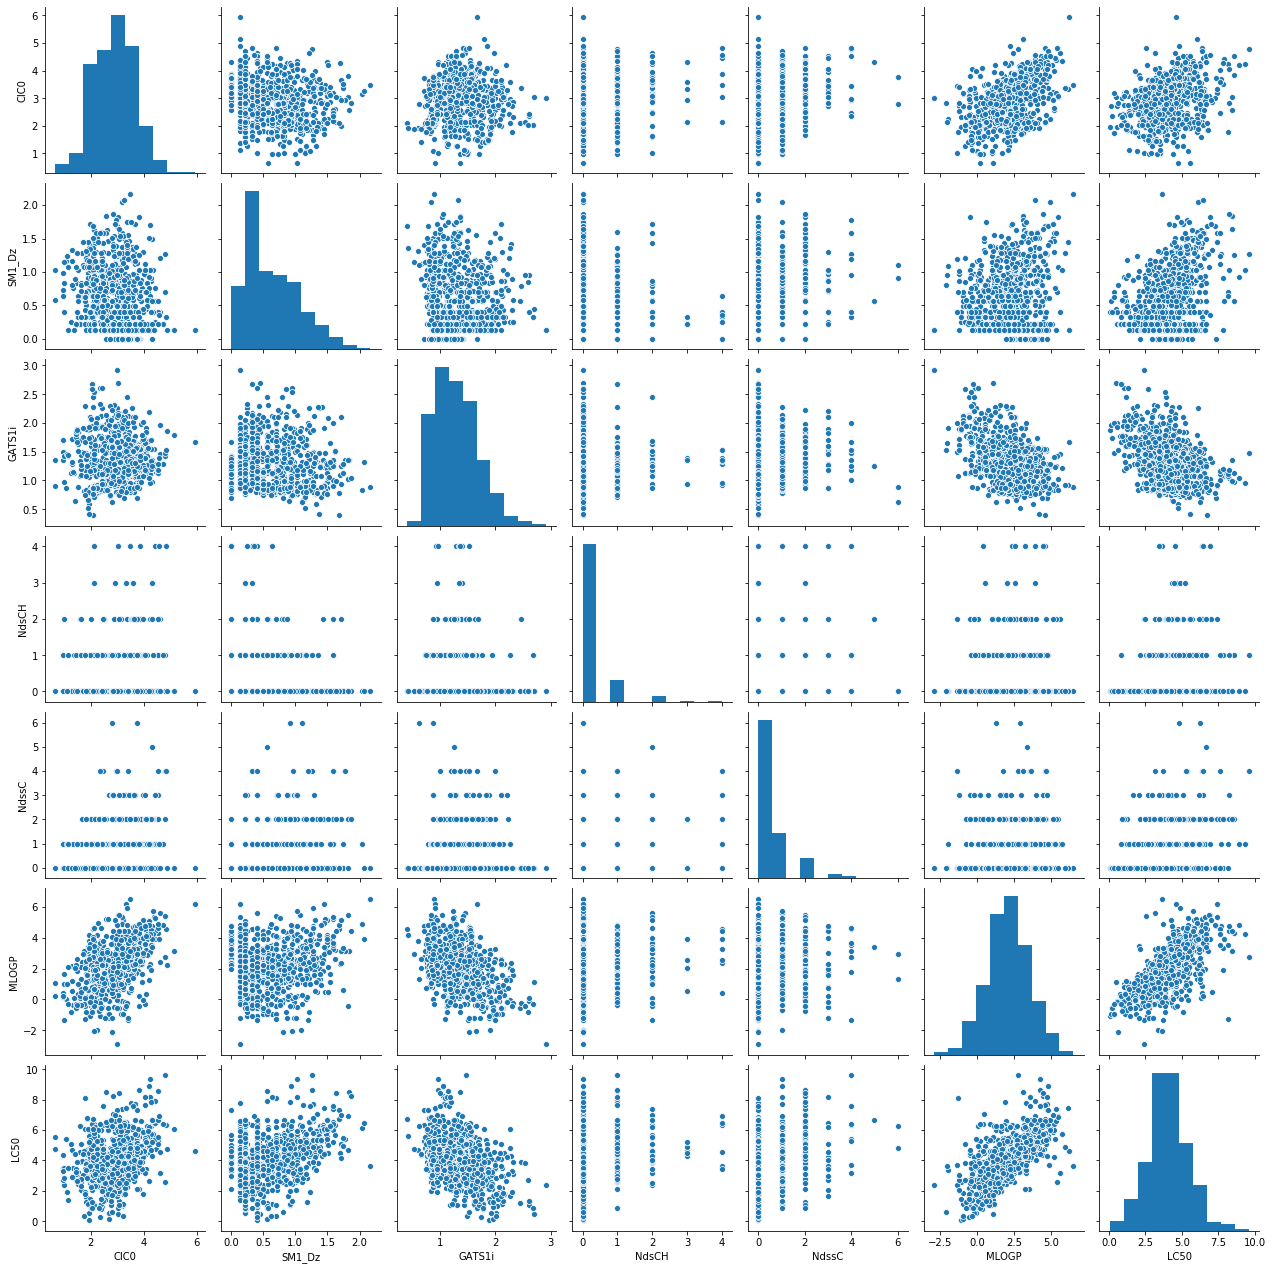

In [74]:
sns.pairplot(df)

In [75]:
cor= df.corr()
print(cor)

            CIC0    SM1_Dz    GATS1i     NdsCH     NdssC     MLOGP      LC50
CIC0    1.000000 -0.235360  0.147622  0.121341  0.246639  0.463867  0.291854
SM1_Dz -0.235360  1.000000 -0.145967 -0.141401  0.163179  0.200663  0.410893
GATS1i  0.147622 -0.145967  1.000000 -0.010657  0.092410 -0.450739 -0.397965
NdsCH   0.121341 -0.141401 -0.010657  1.000000  0.188164  0.048620  0.172004
NdssC   0.246639  0.163179  0.092410  0.188164  1.000000  0.028499  0.172390
MLOGP   0.463867  0.200663 -0.450739  0.048620  0.028499  1.000000  0.651664
LC50    0.291854  0.410893 -0.397965  0.172004  0.172390  0.651664  1.000000


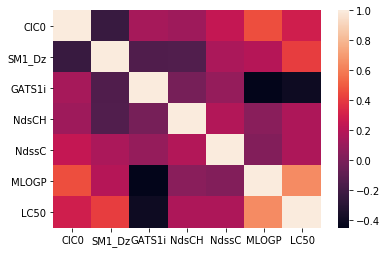

In [76]:
#corelation plot
sns.heatmap(cor)

In [77]:
#checking for the null values 
df.isnull().sum()
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB
             CIC0      SM1_Dz      GATS1i       NdsCH       NdssC       MLOGP  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean     2.898129    0.628468    1.293591    0.229075    0.485683    2.109285   
std      0.756088    0.428459    0.394303    0.605335    0.861279    1.433181   
min      0.667000    0.000000    0.396000    0.000000    0.000000   -2.884000   
25%      2.347000    0.223000    0.950750    0.000000    0.000000    1.209000   
50%      2.934000    0.570

In [78]:
#standard scaling the data
from sklearn.preprocessing import StandardScaler

In [79]:
scaled= StandardScaler()

In [80]:
df_scaled=scaled.fit_transform(df)

In [81]:
df_scaled.reshape(7,-1)

array([[ 0.47887329,  0.46828848,  0.97036948, ..., -0.42019153,
         2.92714136,  1.7591882 ],
       [-1.78672204,  0.20727891,  1.68442276, ...,  2.49694458,
         1.4817789 ,  0.45017786],
       [ 1.27425308,  4.08259604,  0.44660612, ..., -0.19218577,
        -0.09514808, -0.08221669],
       ...,
       [-1.44026082,  0.16921514, -0.52184963, ...,  1.01239739,
        -1.12054708, -0.3786352 ],
       [-0.56421963,  0.24694002,  0.22996093, ...,  0.84375024,
        -0.11000653, -0.15988877],
       [ 0.73945515, -0.3786352 ,  1.7591882 , ...,  2.92089212,
         1.84636323,  2.84320501]])

In [82]:
data_frm= pd.DataFrame(df_scaled,columns=['CIC0','SM1_Dz','GATS1i','NdsCH','NdssC','MLOGP','LC50'])

In [83]:
data_frm

CIC0    SM1_Dz    GATS1i     NdsCH     NdssC     MLOGP      LC50
0    0.478873  0.468288  0.970369 -0.378635  0.597484 -0.458175 -0.202372
1   -0.938408 -0.113184 -1.092634 -0.378635 -0.564220 -0.531479 -0.652576
2   -1.023101  0.022259 -1.173835 -0.378635 -0.564220 -0.531479 -0.366645
3    0.170538 -0.694657  0.452715  1.274253 -0.564220 -0.211035 -0.381079
4   -1.064124  0.463618 -1.100247 -0.378635 -0.564220 -0.155883  0.911109
..        ...       ...       ...       ...       ...       ...       ...
903 -0.128533  0.232430  2.366006 -0.378635  1.759188 -0.958736 -0.656700
904  0.997617  0.568703 -1.082484  2.927141  2.920892  1.308103 -0.016792
905  1.144506  0.671454 -1.054572 -0.378635  6.406004  0.564591  0.517954
906 -0.088833  1.785359 -0.549605 -0.378635  0.597484 -0.840053  0.860934
907  1.533564  0.942340 -0.280628  1.274253  2.920892  1.846363  2.843205

[908 rows x 7 columns]

In [84]:
#geting the dependent and independent variable for test-train split
X= data_frm.drop('LC50', axis=1)
y= data_frm['LC50']

In [85]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1234)

In [86]:
#making the random forest regressor
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor()

In [87]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [88]:
#the R^2 for the untuned model is great for the training data. 
model_rf.score(X_train, y_train)

0.9354477294152282

In [89]:
#prediction for the test data
pred_model_rf= model_rf.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
#we are checking the performance of the model using mean squared error
print(mean_squared_error(y_test, pred_model_rf))

0.38893683634794374


In [92]:
#we are again tuning the Random forest model by using Randamized CV
#Randomized searched tree
#parameter to be tuned
param={'max_depth': [2, 4,6,8],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4,5,7],
        'min_samples_split': [2, 4, 6,8,10],
        'n_estimators': [500]}

In [93]:
from sklearn.model_selection import RandomizedSearchCV
rand_rf= RandomizedSearchCV(model_rf,param, n_iter=20, verbose=3, n_jobs=-1, cv=10)

In [94]:
rand_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [95]:
#mean score of 10-fold CV. This is poor then the previous model. 
rand_rf.cv_results_['mean_test_score']

array([0.60899177, 0.59869336, 0.59128379, 0.56012475, 0.61152698,
       0.60750717, 0.44368019, 0.59722271, 0.44367252, 0.44441209,
       0.4458147 , 0.44388071, 0.44834458, 0.59507879, 0.60725822,
       0.5601636 , 0.60558813, 0.44403819, 0.56011061, 0.44477589])

In [96]:

#extracting the best parameter of the randamized search model
rand_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 8}

In [97]:
#making new model from the extracted best model parameter
new_rf_mod= RandomForestRegressor(n_estimators=500,
 min_samples_split= 8,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 8)

In [98]:
#fitting the X_train
new_rf_mod.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
#R^2 for the new hypertuned model. It is not good then the previous mode
new_rf_mod.score(X_train, y_train)

0.7986487744643449

In [100]:
#predicting for the test data
pred_new_rf=new_rf_mod.predict(X_test)

In [101]:
#calculating the MSE 
print(mean_squared_error(y_test, pred_new_rf))

0.3858783564599372


The previous model R^2 was good however the latter model generalize the data. It gives less MSE then the first model. The first model might be overfitted. However, the last model is more accurate or less error.